###Импорты

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 12.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=51400d06eedf724b85fab9ff7f9b92d805118e470679bcad97c608a74f1515bd
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
!pip install PyPortfolioOpt
from pypfopt import BlackLittermanModel, EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns, risk_models, plotting
from IPython.display import clear_output

     |████████████████████████████████| 61kB 3.8MB/s 
     |████████████████████████████████| 1.3MB 7.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736095 sha256=5b52deb69a4b3b45ab8a812496f1ea1a32438a68b96f09d06ec3efd13e41bfdd
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

To find tickers: https://investexcel.net/

Documentation yahoo: https://pypi.org/project/yfinance/

Optimization basics: https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f

Jupyter examples advanced optimization: https://github.com/robertmartin8/PyPortfolioOpt/tree/master/cookbook

##Данные

In [ ]:
#http://www.b3.com.br/en_us/market-data-and-indices/indices/broad-indices/indice-ibovespa-ibovespa-composition-index-portfolio.htm
brazil = pd.read_csv('/content/drive/MyDrive/ИПС/IBOVESPA.csv', sep = ';', names =['Ticker','q','w','e','r'] )['Ticker']
brazilian_market = pd.DataFrame()
for i in tqdm(brazil):
  try:
    stock = yf.Ticker(i+'.SA')
    hist = stock.history(start = '2014-04-01', end =  '2021-04-01')
    hist['year_month_day'] = pd.to_datetime(hist.index.values).to_period('D')
    brazilian_market[i+'.SA'] = (hist.groupby('year_month_day')['Close'].mean())
  except:
    pass
brazilian_market.dropna(axis = 0, how = 'all', inplace=True)
brazilian_market.dropna(axis = 1, how = 'any', inplace=True)
brazilian_market

,ABEV3.SA,BTOW3.SA,B3SA3.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BBAS3.SA,BRKM5.SA,BRFS3.SA,CCRO3.SA,CMIG4.SA,HGTX3.SA,CIEL3.SA,COGN3.SA,CPLE6.SA,CSAN3.SA,CPFE3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,ENGI11.SA,ENEV3.SA,EGIE3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GGBR4.SA,GOAU4.SA,GOLL4.SA,HYPE3.SA,IGTA3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,JHSF3.SA,KLBN11.SA,RENT3.SA,LCAM3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,BEEF3.SA,MRVE3.SA,MULT3.SA,PCAR3.SA,PETR3.SA,PETR4.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,SBSP3.SA,SANB11.SA,CSNA3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
year_month_day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-01,12.998321,24.132666,2.787724,15.443111,11.077688,10.902683,11.159476,13.268762,15.216265,12.004506,43.166653,12.420750,6.830123,5.582277,15.842525,10.545500,1.765412,6.204962,13.279497,13.369278,9.671124,9.785172,5.185042,6.848852,19.368860,6.392042,8.707517,22.530319,17.680332,3.460436,14.014132,7.056530,12.392035,15.148388,11.01,13.449838,19.426903,4.272838,12.539571,6.623118,3.433450,9.289396,8.856182,0.812494,10.567670,9.239560,0.187642,4.380751,8.564079,4.743470,14.066571,66.558617,13.162124,13.307415,0.950000,14.670863,3.615945,17.219536,8.443617,7.353235,9.463881,18.720858,8.607123,25.108591,9.872504,10.589532,23.445440,9.530549,22.831831,6.379966,4.130543,17.095984
2014-04-02,13.051530,24.650879,2.892970,15.559083,11.345322,11.312799,11.449734,14.002552,15.850842,12.212798,44.021439,12.603949,7.111683,5.582277,15.994850,10.719860,1.818999,6.424169,13.574756,13.590624,9.970009,10.055966,5.415490,7.252096,19.273771,6.608720,8.707517,22.672916,17.985163,3.521985,14.043906,7.001546,12.647088,15.520457,11.70,13.675676,20.063114,4.414202,12.943492,6.947695,3.519501,9.602254,8.867081,0.797722,10.953908,9.348607,0.196469,4.538972,8.816220,4.838697,14.347668,66.558617,13.223343,13.096988,0.940000,15.015906,3.576721,17.355627,8.672916,7.497416,9.647340,18.720858,8.711480,24.237600,10.014376,10.589532,23.883514,9.818192,23.683653,6.379966,4.203511,17.569408
2014-04-03,13.104925,25.017200,2.890403,15.437005,11.089324,11.057449,11.389471,14.137191,15.603692,12.129479,43.812492,12.823783,7.057189,5.582277,16.038383,10.528279,1.786251,6.420634,13.538750,14.051023,9.478982,9.880317,5.622890,7.403313,19.264263,6.621465,8.707517,22.245127,17.553314,3.511727,13.895031,6.913568,12.594317,15.493877,12.40,13.466568,20.152723,4.400521,12.792937,6.798566,3.476476,9.626319,8.965180,0.775563,10.991897,9.290452,0.197608,4.548861,9.042276,4.642292,14.207119,66.558617,13.647813,13.821446,0.950000,14.939230,3.642093,17.587782,8.565010,7.436708,9.368992,18.720858,8.529988,24.027357,9.964303,10.678520,23.335920,9.645609,23.960318,6.379966,4.215239,17.321424
2014-04-04,12.891342,25.553284,2.910939,15.351545,11.199871,10.705137,11.254769,14.130458,15.743958,12.171140,43.641537,12.391438,7.043563,5.582277,15.559622,10.472312,1.804709,6.519629,13.488338,13.900508,9.379354,9.807127,5.515349,7.434816,18.912447,6.392042,8.707517,22.530319,17.334854,3.503179,13.989319,6.961222,12.268907,15.033225,12.23,13.550209,19.606117,4.345800,12.609344,6.789793,3.485081,9.698516,9.101429,0.792797,10.839935,9.341334,0.199032,4.529083,9.120527,4.642292,14.333028,66.558617,13.511787,13.857347,0.960000,14.696422,3.716802,17.651827,8.497569,7.565713,9.425926,18.720858,8.484617,24.027357,9.713944,10.464950,23.424381,9.751076,23.647249,6.832241,4.247814,17.306395
2014-04-07,12.891342,25.937477,2.995649,15.723889,11.403503,11.316028,11.708502,14.386275,16.632355,12.171140,44.211395,12.310831,7.202508,5.582277,15.907811,10.289342,1.792205,6.547915,13.409124,14.148414,9.358004,9.814446,5.684343,7.548228,18.389482,6.309192,8.707517,23.243305,17.365337,3.504888,14.053832,6.865913,12.145777,14.962356,12.25,13.734221,19.597160,4.414202,12.895752,6.903834,3.485081,9.770710,9.403902,0.782949,10.998228,9.547789,0.203018,4.548861,9.242249,4.624436,14

In [ ]:
brazilian_market = brazilian_market[['ABEV3.SA', 'BTOW3.SA', 'B3SA3.SA', 'BBSE3.SA', 'BRML3.SA', 'BBDC3.SA',
       'BBDC4.SA', 'BRAP4.SA', 'BBAS3.SA', 'BRKM5.SA', 'BRFS3.SA', 'CCRO3.SA',
       'CMIG4.SA', 'CIEL3.SA', 'COGN3.SA', 'CPLE6.SA', 'CSAN3.SA',
        'CVCB3.SA', 'CYRE3.SA', 'ECOR3.SA', 'ELET3.SA', 'ELET6.SA',
       'EMBR3.SA', 'ENBR3.SA', 'ENGI11.SA', 'ENEV3.SA', 'EGIE3.SA', 'EQTL3.SA','EZTC3.SA','FLRY3.SA']]

In [ ]:
IBOVESPA = pd.DataFrame()
stock = yf.Ticker('^BVSP')
hist = stock.history(start = '2014-04-01', end = '2021-04-01')
hist['year_month'] = pd.to_datetime(hist.index.values).to_period('D')
IBOVESPA['IBOVESPA'] = (hist.groupby('year_month')['Close'].mean())
IBOVESPA.dropna(axis = 0, how = 'all', inplace=True)
IBOVESPA

,IBOVESPA
year_month,
2014-04-01,50270.0
2014-04-02,51701.0
2014-04-03,51408.0
2014-04-04,51082.0
2014-04-07,52155.0
...,...
2021-03-25,113750.0
2021-03-26,114781.0
2021-03-29,115419.0


In [ ]:
from google.colab import files
rus =pd.merge(IBOVESPA, brazilian_market , left_on=IBOVESPA.index, right_on = brazilian_market.index)
rus.set_index('key_0', inplace = True)
rus.to_csv('brazilian_market.csv')

files.download('brazilian_market.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#https://www.dax-indices.com/ressourcen
g = pd.read_excel('/content/drive/MyDrive/ИПС/Biggest_cap_germany.xls', sheet_name='Data')[['Unnamed: 3','Unnamed: 6']]
germ = g[(g['Unnamed: 6'] == 'DAX') ]['Unnamed: 3']
len(germ)
german_market = pd.DataFrame()
for i in tqdm(germ):
  try:
    stock = yf.Ticker(i +'.DE')
    hist = stock.history(start = '2014-04-01', end = '2021-04-01')
    hist['year_month'] = pd.to_datetime(hist.index.values).to_period('D')
    german_market[i +'.DE'] = (hist.groupby('year_month')['Close'].mean())
  except:
    pass
german_market.drop(columns=['LIN.DE'], inplace=True)
german_market.dropna(axis = 0, how = 'all', inplace=True)
german_market.dropna(axis = 1, how = 'any', inplace=True)
german_market_dax = german_market

In [ ]:
german_market_dax = german_market_dax[['SAP.DE', 'SIE.DE', 'ALV.DE', 'BAS.DE', 'DAI.DE', 'BAYN.DE', 'ADS.DE',
       'DTE.DE', 'IFX.DE', 'DPW.DE', 'MUV2.DE', 'VOW3.DE', 'DB1.DE', 'RWE.DE',
       'BMW.DE', 'DBK.DE', 'EOAN.DE', 'MRK.DE', 'HEN3.DE', 'FRE.DE']]

In [ ]:
DAX = pd.DataFrame()
stock = yf.Ticker('^GDAXI')
hist = stock.history(start = '2014-04-01', end = '2021-04-01')
hist['year_month'] = pd.to_datetime(hist.index.values).to_period('D')
DAX['DAX'] = (hist.groupby('year_month')['Close'].mean())
DAX.dropna(axis = 0, how = 'all', inplace=True)
DAX

,DAX
year_month,
2014-04-01,9603.709961
2014-04-02,9623.360352
2014-04-03,9628.820312
2014-04-04,9695.769531
2014-04-07,9510.849609
...,...
2021-03-25,14621.360352
2021-03-26,14748.940430
2021-03-29,14817.719727


In [ ]:
from google.colab import files
rus =pd.merge(DAX, german_market_dax , left_on=DAX.index, right_on = german_market_dax.index)
rus.set_index('key_0', inplace = True)
rus.to_csv('german_market_dax.csv')

files.download('german_market_dax.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#https://www.dax-indices.com/ressourcen
g = pd.read_excel('/content/drive/MyDrive/ИПС/Biggest_cap_germany.xls', sheet_name='Data')[['Unnamed: 3','Unnamed: 6']]
germ = g[(g['Unnamed: 6'] == 'MDAX') ]['Unnamed: 3']
len(germ)
german_market = pd.DataFrame()
for i in tqdm(germ):
  try:
    stock = yf.Ticker(i +'.DE')
    hist = stock.history(start = '2014-04-01', end = '2021-04-01')
    hist['year_month'] = pd.to_datetime(hist.index.values).to_period('D')
    german_market[i +'.DE'] = (hist.groupby('year_month')['Close'].mean())
  except:
    pass
german_market.drop(columns=['COP.DE'], inplace=True)
german_market.dropna(axis = 0, how = 'all', inplace=True)
german_market.dropna(axis = 1, how = 'any', inplace=True)
german_market_mdax = german_market
german_market_mdax

,AIR.DE,SY1.DE,SRT3.DE,QIA.DE,BNR.DE,LEG.DE,HNR1.DE,PUM.DE,CBK.DE,EVK.DE,TKA.DE,KGX.DE,LXS.DE,AFX.DE,LHA.DE,EVT.DE,BC8.DE,G1A.DE,RAA.DE,RHM.DE,TEG.DE,UTDI.DE,FPE3.DE,PSM.DE,EVD.DE,NEM.DE,MOR.DE,GXI.DE,VAR1.DE,AOX.DE,FNTN.DE,NDA.DE,O2D.DE,SAX.DE,COK.DE,AIXA.DE,SOW.DE,SDF.DE,WCH.DE,FRA.DE,DUE.DE,BOSS.DE,HOT.DE,OSR.DE,ARL.DE
year_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-01,46.050293,32.268875,23.402756,15.310523,37.826862,35.950825,56.088097,19.315815,12.294674,19.872347,19.191486,30.805925,49.462837,18.957962,17.001484,3.875000,28.742664,27.983345,232.794662,43.311703,6.256958,30.386335,30.873890,19.445875,22.124100,4.633617,68.080002,42.174786,8.900000,6.761562,17.692106,31.553747,2.475225,11.271732,16.182415,11.791560,22.713322,19.711285,74.039368,45.245144,22.571075,65.828430,50.020451,41.235619,20.786221
2014-04-02,45.719807,32.358341,23.421778,15.330453,37.406567,36.082371,55.735661,19.382000,12.525894,19.785065,19.085455,30.500835,49.731270,19.250196,17.238165,4.020000,28.309242,27.929688,231.825058,43.353344,6.159628,30.817255,30.159391,19.292599,21.720005,4.643655,68.129997,42.099422,8.900000,6.898154,17.616385,32.157387,2.510414,11.297805,15.988228,11.915682,22.713322,19.719610,74.607140,45.161900,23.008892,65.432762,49.892159,41.429871,20.680981
2014-04-03,46.154655,32.349392,23.702364,15.370311,37.756813,36.458233,55.477791,19.575817,12.557019,19.711746,19.119192,30.580427,49.937069,19.551702,17.251312,4.001000,28.710728,27.921436,233.808350,43.561531,6.111659,31.026049,30.125959,19.176920,21.008251,4.686895,68.000000,42.383160,8.900000,6.836378,17.612940,32.805275,2.475225,11.323876,15.773231,12.084488,22.292704,19.511381,74.055817,44.579163,23.415438,65.323639,49.431801,42.153927,20.633146
2014-04-04,47.015652,32.362812,23.778456,15.335435,38.051025,36.356754,56.070908,19.457634,12.823812,19.956135,19.389090,30.491991,49.883377,20.210386,17.759735,3.974000,28.560169,28.235111,236.011963,43.819687,6.163800,31.625776,30.163565,19.182703,21.077133,4.710060,66.800003,42.427490,8.900000,6.884425,17.836670,32.990391,2.497540,11.228280,15.606786,11.965331,22.305321,19.761261,73.948853,44.912155,23.696892,65.541931,49.816692,41.986160,20.904217
2014-04-07,46.267715,32.362812,23.778456,15.081339,37.798840,36.262787,55.237106,19.377270,12.632611,19.823467,18.998703,29.908331,48.693336,19.500677,17.461695,3.810000,28.181499,27.851267,231.428391,42.978603,6.177009,30.257507,29.871078,18.769146,21.168970,4.652149,63.709999,41.505352,8.900000,6.877561,17.520004,32.950146,2.451623,11.219588,15.107441,11.707157,22.141281,19.361456,71.274620,44.945454,23.192621,65.214485,48.948803,39.028149,21.057289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,96.459999,101.088951,431.091614,41.430000,70.239555,108.638390,148.723373,81.211906,5.228000,27.685926,10.460000,78.710205,61.281025,130.659332,10.965000,30.270000,159.300003,33.208435,673.313599,81.177040,23.305067,33.638973,39.946194,17.212252,49.560001,53.861870,73.980003,82.071404,126.099998,13.525871,20.010000,66.180000,2.227238,71.699997,52.000000,17.992682,34.548653,8.262000,110.809143,50.450001,33.470463,34.276527,69.369400,52.160000,22.858957
2021-03-26,97.739998,101.237610,432.089966,41.250000,71.202278,108.774086,150.276627,82.150192,5.216000,27.935265,10.920000,80.799850,61.890884,129.762344,10.935000,29.629999,161.899994,33.325642,671.325928,82.231789,23.555658,34.111927,40.024364,17.309662,49.400002,54.806808,75.220001,82.071404,128.600006,13.487309,20.150000,70.320000,2.297709,71.699997,52.049999,18.588463,34.978798,8.482000,114.548714,51.000000,34.263603,34.026772,70.224640,52.340000,23.495535
2021-03-29,97.360001,102.476448,427.600006,41.230000,71.123688,108.502686,150.567871,81.152016,5.142000,27.842918,10.980000,80.998871,61.379391,129.463348,10.955000,29.340000,161.000000,33.354946,664.866089,82.622444,23.34

In [ ]:
german_market_mdax = german_market_mdax[['AIR.DE', 'SY1.DE', 'SRT3.DE', 'QIA.DE', 'BNR.DE', 'HNR1.DE', 'PUM.DE',
       'CBK.DE', 'TKA.DE', 'LXS.DE', 'AFX.DE', 'LHA.DE', 'EVT.DE', 'BC8.DE',
       'G1A.DE', 'RAA.DE', 'RHM.DE', 'TEG.DE', 'UTDI.DE', 'FPE3.DE', 'PSM.DE',
       'EVD.DE', 'NEM.DE', 'MOR.DE', 'GXI.DE', 'AIXA.DE', 'AOX.DE', 'FNTN.DE',
       'NDA.DE', 'COK.DE']]

In [ ]:
MDAX = pd.DataFrame()
stock = yf.Ticker('^MDAXI')
hist = stock.history(start = '2014-04-01', end = '2021-04-01')
hist['year_month'] = pd.to_datetime(hist.index.values).to_period('D')
MDAX['MDAX'] = (hist.groupby('year_month')['Close'].mean())
MDAX.dropna(axis = 0, how = 'all', inplace=True)
MDAX

,MDAX
year_month,
2014-04-01,16606.710938
2014-04-02,16614.580078
2014-04-03,16628.839844
2014-04-04,16714.250000
2014-04-07,16482.830078
...,...
2021-03-25,31321.599609
2021-03-26,31594.839844
2021-03-29,31460.500000


In [ ]:
from google.colab import files
rus =pd.merge(MDAX, german_market_mdax , left_on=MDAX.index, right_on = german_market_mdax.index)
rus.set_index('key_0', inplace = True)
rus.to_csv('german_market_mdax.csv')

files.download('german_market_mdax.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
k = pd.read_excel('/content/drive/MyDrive/ИПС/moex.xlsx', sheet_name=None)
ind = []
for i in k.keys():
  for j in k[i]['Unnamed: 1'].values:
    if j in ind:
      pass
    else:
      ind.append(j)
ind  = list(set(ind))
russia = [i for i in ind if len(str(i)) <=4]
russian_market = pd.DataFrame()
for i in tqdm(russia):
  try:
    stock = yf.Ticker(i+'.ME')
    hist = stock.history(start = '2010-04-01', end = '2021-04-01')
    hist['year_month'] = pd.to_datetime(hist.index.values).to_period('D')
    russian_market[i+'.ME'] = (hist.groupby('year_month')['Close'].mean())
  except:
    pass
russian_market.drop(columns='DIXY.ME', inplace=True)
# russian_market.dropna(axis = 0, how = 'all', inplace=True)
# russian_market.dropna(axis = 1, how = 'any', inplace=True)
russian_market

In [ ]:
MOEX = pd.DataFrame()
stock = yf.Ticker('IMOEX.ME')
hist = stock.history(start = '2010-04-01', end = '2021-04-01')
hist['year_month'] = pd.to_datetime(hist.index.values).to_period('D')
MOEX['MOEX'] = (hist.groupby('year_month')['Close'].mean())
MOEX

,MOEX
year_month,
2013-03-05,1486.420044
2013-03-06,1491.489990
2013-03-07,1491.349976
2013-03-11,1505.930054
2013-03-12,1499.739990
...,...
2021-03-25,3439.300049
2021-03-26,3489.830078
2021-03-29,3529.330078


##Тесты на нормальность

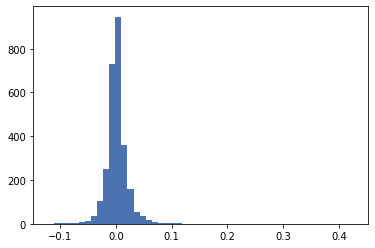

In [ ]:
plt.hist(russian_market[russian_market.columns[23]].pct_change()[1:].values, bins=50)
plt.show()

In [ ]:
stats.kurtosis(x)

17.12115993388064

In [ ]:
from scipy import stats
data = brazilian_market
for i in range(len(data.columns)):
  x = data[data.columns[i]].pct_change()[1:]
  k2, p = stats.kstest(x, stats.norm(np.mean(x), np.std(x)).cdf)
  alpha = 0.05
  print(stats.kurtosis(x))
  print("p = {:.10f}".format(float(p)), i)
  if p < alpha:  # null hypothesis: x comes from a normal distribution
      print("The null hypothesis can be rejected", i)
  else:
      print("The null hypothesis cannot be rejected", i)

7.982828630812277
p = 0.0000002034 0
The null hypothesis can be rejected 0
9.254477971647123
p = 0.0000000029 1
The null hypothesis can be rejected 1
6.636729350020481
p = 0.0000003800 2
The null hypothesis can be rejected 2
5.337417861568497
p = 0.0000002782 3
The null hypothesis can be rejected 3
6.910733260038896
p = 0.0000000116 4
The null hypothesis can be rejected 4
3.9712473162626116
p = 0.0000000008 5
The null hypothesis can be rejected 5
6.8893831032294415
p = 0.0000000010 6
The null hypothesis can be rejected 6
18.964725869300313
p = 0.0000000000 7
The null hypothesis can be rejected 7
10.435851682911402
p = 0.0000000000 8
The null hypothesis can be rejected 8
10.023229441103302
p = 0.0000000197 9
The null hypothesis can be rejected 9
7.810181854974271
p = 0.0000000358 10
The null hypothesis can be rejected 10
1504.3085791927915
p = 0.0000000000 11
The null hypothesis can be rejected 11
12.347913053202936
p = 0.0000000000 12
The null hypothesis can be rejected 12
4.7002063889

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(x,)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.926, p=0.000


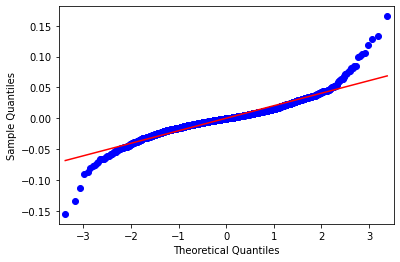

In [ ]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(x, line='s')
plt.show()

##Optimizer

In [22]:
def optimizer(market, return_method, cov_method, window, bounds):
  sharpe = []
  weights = []
  index = []
  for i in tqdm(range(market.shape[0]-(window+1))):
    # Calculate expected returns and sample covariance
    x = market[i:window+i]
    mu = expected_returns.return_model(x, method=return_method)
    S = risk_models.risk_matrix(x, method=cov_method)
    ef = EfficientFrontier(mu, S, weight_bounds=bounds)
    raw_weights = ef.min_volatility()
    cleaned_weights = ef.clean_weights()
    sharpe.append(ef.portfolio_performance()[2])
    weights.append(raw_weights)
    index.append(market[i:window+i].index[-1])
  weight = []
  for i in weights:
    a = []
    for j in market.columns: 
      try:
        a.append(i[j])
      except:
        a.append(0)
    weight.append(a)
  market_weights = pd.DataFrame(weight, columns = market.columns, index=index)
  return market_weights

In [23]:
def returns(weights, prices, holding_period = 20):
  all = []
  ind = []
  for i in tqdm(range(0,(len(weights) - holding_period)-1, holding_period)):
    delta = (prices.loc[weights.index[i+1 + holding_period]]  - prices.loc[weights.index[i+1]])
    profit = np.sum(weights.loc[weights.index[i]] * delta)
    ret = profit/np.sum(weights.loc[weights.index[i]]*prices.loc[weights.index[i+1]])
    all.append(ret*100)
    if i == 0:
      ind.append(weights.index[i+1])
    ind.append(weights.index[i+1 + holding_period])    #индекс дня ребалансировки
  return np.array(all), np.array(ind)

In [24]:
def real_returns(ind,market_weights,market):
  a = market_weights.loc[ind]
  x= pd.DataFrame(np.zeros(market_weights.shape), index=market_weights.index, columns = market_weights.columns)[1:]
  id = a.index[0]
  values = []
  for i in x.index:
    if i in a.index:
      values.append(a.loc[i].values)
      id = i
    else:
      values.append(a.loc[id].values)

  all_w = pd.DataFrame(np.array(values), index=market_weights.index[1:], columns = market_weights.columns)
  try:
    rets = (market.pct_change().loc[market_weights.index][1:]*np.array(all_w)).sum(axis=1)[1:]
  except:
    rets = (market.pct_change().loc[market_weights.index][1:])[1:]
  return rets

In [25]:
def max_drawdown(dohod):
  listok = []
  max = 0
  for i in range(len(dohod)):
    if max < dohod[i]:
      max = dohod[i]
      listok.append(dohod[i])
    else:
      listok.append(max)
  ind = list(np.array(dohod) - np.array(listok)).index(np.min(np.array(dohod) - np.array(listok)))
  return (np.max(np.array(dohod[:ind])) -  dohod[ind])/np.max(np.array(dohod[:ind]))*100

In [26]:
def total_return(dohod):
  return (dohod[-1] -dohod[0]) /dohod[0]

In [27]:
def total_volatility(ret):
  return np.sum((ret -ret.mean())**2)/len(ret)

In [28]:
def turnover(market_weights,market, ind):
  b = np.array(market_weights.loc[ind].iloc[1:])
  a = ((np.array(market_weights.loc[ind].iloc[:-1]) * np.array(market.loc[ind].iloc[1:]))/np.sum(np.array(market_weights.loc[ind].iloc[:-1]) * np.array(market.loc[ind].iloc[1:]), axis=1).reshape((market_weights.loc[ind].iloc[1:].shape[0],1)))
  return np.sum(np.abs(a - b))/np.abs(a - b).shape[0]

##Парадигма исследования

**Горизонты оценивания:** ??


*   63 торговых дня - 3 месяца
*   189 торговых дней - 6 месяцев
*   252 торговых дня - 12 месяцев 

**Горизонты удержания:** ??


*   21 торговый день - 1 месяц
*   63 торговых дня - 3 месяца
*   189 торговых дней - 6 месяцев
*   252 торговых дня - 12 месяцев

**Оциваниемые страны:**


*   Россия (31 компания)
*   Германия (2 выборки - DAX и MDAX, количество - ?)
*   Бразилия (IBOVESPA?)
*   Тайланд или ничего ??

**Выборки**

10,20,30

**Методы:**

Будет оцениваться GMVP

    "sample_cov",
    "exp_cov",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating"
с ограничением на короткие позиции и без

**Бенчмарки:**



*   Равновзвешенный портфель
*   Индекс(ы) для каждой страны

**Метрики:**



*   Return
*   Variance
*   Max drawdown
*   Sharpe ??
*   Turnover














##Optimization


In [11]:
risk_methods = [    "sample_cov",
    # "semicovariance",
    "exp_cov",
    # "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    # "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    # "oracle_approximating"
]
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return"
    ]
# spanfloat, optional
# Specify decay in terms of span, α=2/(span+1), for span≥1.

# https://tedboy.github.io/pandas/computation/computation5.html - как считается экспоненц взвеш
# https://reasonabledeviations.com/2018/08/15/exponential-covariance/

In [56]:
import pandas as pd
# https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/brazilian_market.csv
#https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/german_market_dax.csv
#https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/german_market_mdax.csv
#https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/russian_market.csv
url = 'https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/brazilian_market.csv?raw=true'
rus = pd.read_csv(url,index_col=0)
rus.head()

,IBOVESPA,ABEV3.SA,BTOW3.SA,B3SA3.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BBAS3.SA,BRKM5.SA,BRFS3.SA,CCRO3.SA,CMIG4.SA,CIEL3.SA,COGN3.SA,CPLE6.SA,CSAN3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,ENGI11.SA,ENEV3.SA,EGIE3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA
key_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-01,50270.0,12.998321,24.132666,2.787724,15.443111,11.077688,10.902683,11.159476,13.268762,15.216265,12.004506,43.166653,12.420750,6.830123,15.842525,10.545500,1.765412,6.204962,13.369278,9.671124,9.785172,5.185042,6.848852,19.368860,6.392042,8.707517,22.530319,17.680332,3.460436,14.014132,7.056530
2014-04-02,51701.0,13.051530,24.650879,2.892970,15.559083,11.345322,11.312799,11.449734,14.002552,15.850842,12.212798,44.021439,12.603949,7.111683,15.994850,10.719860,1.818999,6.424169,13.590624,9.970009,10.055966,5.415490,7.252096,19.273771,6.608720,8.707517,22.672916,17.985163,3.521985,14.043906,7.001546
2014-04-03,51408.0,13.104925,25.017200,2.890403,15.437005,11.089324,11.057449,11.389471,14.137191,15.603692,12.129479,43.812492,12.823783,7.057189,16.038383,10.528279,1.786251,6.420634,14.051023,9.478982,9.880317,5.622890,7.403313,19.264263,6.621465,8.707517,22.245127,17.553314,3.511727,13.895031,6.913568
2014-04-04,51082.0,12.891342,25.553284,2.910939,15.351545,11.199871,10.705137,11.254769,14.130458,15.743958,12.171140,43.641537,12.391438,7.043563,15.559622,10.472312,1.804709,6.519629,13.900508,9.379354,9.807127,5.515349,7.434816,18.912447,6.392042,8.707517,22.530319,17.334854,3.503179,13.989319,6.961222
2014-04-07,52155.0,12.891342,25.937477,2.995649,15.723889,11.403503,11.316028,11.708502,14.386275,16.632355,12.171140,44.211395,12.310831,7.202508,15.907811,10.289342,1.792205,6.547915,14.148414,9.358004,9.814446,5.684343,7.548228,18.389482,6.309192,8.707517,23.243305,17.365337,3.504888,14.053832,6.865913


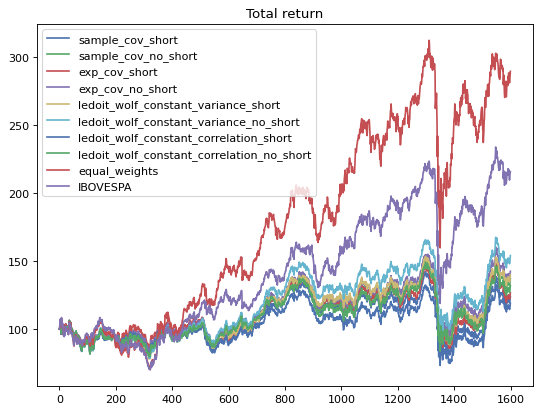

In [24]:
window = 126
return_method = return_methods[0]
market_index = 'IBOVESPA'
num_assets = 10
market = rus.drop(market_index, axis=1).iloc[:, : num_assets]
hp = 63
lower_bound = [-1,0]

all_ret = dict()
for i in risk_methods:
  for j in lower_bound:
    bounds = (j, 1)
    market_weights = optimizer(market, return_method, i, window, bounds)
    # ret = returns(market_weights, market, holding_period = hp)[0]
    ind = returns(market_weights, market, holding_period = hp)[1]
    ret = real_returns(ind,market_weights, market).values*100
    indicies = real_returns(ind,market_weights, market).index
    dohod = np.append(np.array(100),((ret+100)/100).cumprod()*100)
    maxdd = max_drawdown(dohod)
    total_ret = total_return(dohod)
    total_vol = total_volatility(ret)
    turn = turnover(market_weights, market, ind)
    x = [market_weights,ret,ind, dohod,maxdd,total_ret, total_vol, turn]
    if j == -1:
      key = i + '_short'
      all_ret[key] = x
      print(key)
    if j == 0:
      key = i + '_no_short'
      all_ret[key] = x
      print(key)

# benchmarks
equal_weights = pd.DataFrame(np.ones(market_weights.shape)*1/market.shape[1],
                             index = market_weights.index, columns=market.columns)
index_weights = pd.DataFrame(np.ones(market_weights.shape[0])*1,
                             index = market_weights.index, columns=[market_index])
mo = rus[market_index]
# ret_eq =  returns(equal_weights, market, holding_period = hp)[0]
# ret_ind = returns(index_weights, mo, holding_period = hp)[0]
ret_eq =  real_returns(ind,equal_weights, market).values *100
ret_ind =  real_returns(ind,index_weights, mo).values *100
all_ret['equal_weights'] = [equal_weights, ret_eq, ind,
                            np.append(np.array(100),((ret_eq+100)/100).cumprod()*100),
                            max_drawdown(np.append(np.array(100),((ret_eq+100)/100).cumprod()*100)),
                            total_return(np.append(np.array(100),((ret_eq+100)/100).cumprod()*100)),
                            total_volatility(ret_eq),
                            np.nan]
all_ret[market_index] = [index_weights, ret_ind, ind,
                            np.append(np.array(100),((ret_ind+100)/100).cumprod()*100),
                            max_drawdown(np.append(np.array(100),((ret_ind+100)/100).cumprod()*100)),
                            total_return(np.append(np.array(100),((ret_ind+100)/100).cumprod()*100)),
                            total_volatility(ret_ind),
                            np.nan]

clear_output(wait=True)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for i in all_ret.keys():
  a = all_ret[i][3]
  plt.plot(a, label =i)
plt.title('Total return')
plt.legend()
plt.show()

In [27]:
import plotly.graph_objects as go
# fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
k = list(all_ret.keys())
fig = go.Figure()
for i in all_ret.keys():
  a = all_ret[i][3]
  fig.add_trace(go.Scatter(x=np.arange(len(a)), y=a, name=i,mode='lines',
                         line=dict(width=1.5)))
fig.update_layout(title='Total return',
                   yaxis_title='Return',
                  xaxis_title = 'Period number')
fig.show()

# plt.title('Total return')
# plt.legend()
# plt.show()

In [ ]:
df= pd.DataFrame(all_ret, index=['weights','returns','indicies', 'cum_return','max_drawdown','total_return',
                                 'total_volatility', 'turnover'])[4:]
df.columns = ['Cov(s)', 'Cov(ns)', 'Exp(s)', 'Exp(ns)', 'LW CV (s)', 'LW CV (ns)', 'LW CC (s)', 'LW CC (ns)', 'Equal', 'MOEX']
# df.to_latex()
df

,Cov(s),Cov(ns),Exp(s),Exp(ns),LW CV (s),LW CV (ns),LW CC (s),LW CC (ns),Equal,MOEX
max_drawdown,30.5234,30.625,28.8238,28.8155,32.5737,32.5737,31.0628,31.0628,34.9691,34.3884
total_return,3.9351,4.39593,4.03157,4.39401,4.49483,4.68506,4.35642,4.31812,3.93205,1.56427
total_volatility,1.0243,0.996458,1.01173,0.992541,0.936739,0.9308,1.00429,0.995786,1.0433,1.33871
turnover,1.38303,1.08066,1.62545,1.10802,1.24775,1.18721,1.25404,1.12968,NaN,NaN


In [ ]:
df.to_latex()


'\\begin{tabular}{lllllllllll}\n\\toprule\n{} &   Cov(s) &   Cov(ns) &   Exp(s) &   Exp(ns) & LW CV (s) & LW CV (ns) & LW CC (s) & LW CC (ns) &    Equal &     MOEX \\\\\n\\midrule\nmax\\_drawdown     &  30.5234 &    30.625 &  28.8238 &   28.8155 &   32.5737 &    32.5737 &   31.0628 &    31.0628 &  34.9691 &  34.3884 \\\\\ntotal\\_return     &   3.9351 &   4.39593 &  4.03157 &   4.39401 &   4.49483 &    4.68506 &   4.35642 &    4.31812 &  3.93205 &  1.56427 \\\\\ntotal\\_volatility &   1.0243 &  0.996458 &  1.01173 &  0.992541 &  0.936739 &     0.9308 &   1.00429 &   0.995786 &   1.0433 &  1.33871 \\\\\nturnover         &  1.38303 &   1.08066 &  1.62545 &   1.10802 &   1.24775 &    1.18721 &   1.25404 &    1.12968 &      NaN &      NaN \\\\\n\\bottomrule\n\\end{tabular}\n'

Формирование псевдо-индексов

In [76]:
url = 'https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/IBOVESPA_weights.xlsx?raw=true'
weight = pd.read_excel(url,index_col=0)
num_assets = 30
w = weight.T.iloc[:, : num_assets]
a = w/w.sum().sum()
ret_eq = (rus.drop('IBOVESPA', axis=1).iloc[:, : num_assets].pct_change()*np.array(a)).sum(axis=1).values*100
d = pd.DataFrame([
max_drawdown(np.append(np.array(100),((ret_eq+100)/100).cumprod()*100)),
total_return(np.append(np.array(100),((ret_eq+100)/100).cumprod()*100)),
total_volatility(ret_eq),np.nan], columns= ['IBOVESPA30'])
d

,IBOVESPA30
0,50.334055
1,0.698945
2,3.081842
3,NaN


Описательные статистики

In [79]:
import pandas as pd
import numpy as np
# https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/brazilian_market.csv
#https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/german_market_dax.csv
#https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/german_market_mdax.csv
#https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/russian_market.csv
url = 'https://github.com/ontenkutsenko/Portfolio-optimization/blob/main/brazilian_market.csv?raw=true'
rus = pd.read_csv(url,index_col=0)

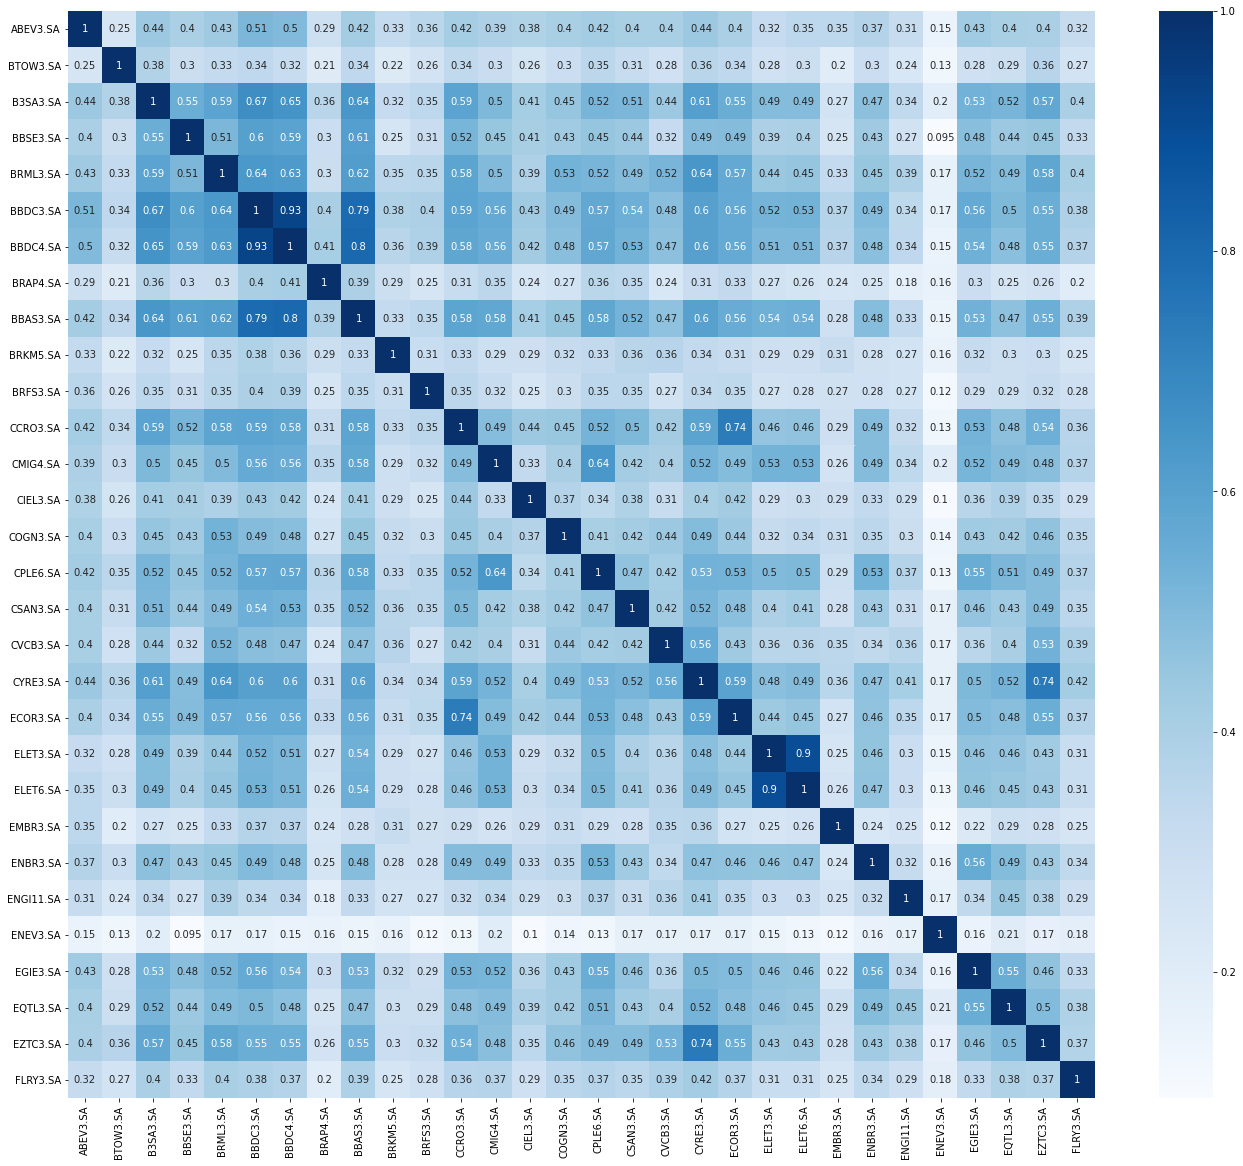

In [80]:
import seaborn as sns
corrMatrix = rus.drop(columns = 'IBOVESPA').pct_change()[1:].corr()
fig, ax = plt.subplots(figsize=(23,20))
cmap = sns.diverging_palette(133, 10, as_cmap=True)
sns.heatmap(ax = ax, data = corrMatrix, annot = True, cmap = 'Blues' , alpha =5 )
plt.show()

In [82]:
df1 = rus.drop(columns = 'IBOVESPA').pct_change()[1:]
max = np.array(df1.max(axis = 0))
min = np.array(df1.min(axis = 0))
mean = np.array(df1.mean(axis = 0))
med = np.array(df1.median(axis = 0))
std = np.array(df1.std(axis = 0))
cum_ret = np.array((df1+1).cumprod().iloc[-1].values)
data = [mean, med, std, min, max, cum_ret]
stat = pd.DataFrame(data, columns = df1.max(axis = 0).index)
stat = stat.transpose()
stat.rename(columns = {0:'Средняя доходность', 1:'Медианная доходность', 2:'Стандартное отклонение', 3:'Минимум',4:'Максимум', 5:'Накопленная доходность'}, inplace=True)
# stat = stat[1:]
stat = stat.round(4)
stat

,Средняя доходность,Медианная доходность,Стандартное отклонение,Минимум,Максимум,Накопленная доходность
ABEV3.SA,0.0002,0.0000,0.0174,-0.1578,0.0987,1.1763
BTOW3.SA,0.0012,-0.0003,0.0372,-0.1697,0.2740,2.5173
B3SA3.SA,0.0014,0.0005,0.0242,-0.1612,0.1924,6.5310
BBSE3.SA,0.0005,0.0007,0.0203,-0.1023,0.1091,1.5703
BRML3.SA,0.0003,-0.0007,0.0264,-0.2388,0.1536,0.9135
BBDC3.SA,0.0007,0.0003,0.0235,-0.1435,0.1633,1.9542
BBDC4.SA,0.0007,0.0003,0.0243,-0.1427,0.1687,2.1742
BRAP4.SA,0.0014,0.0004,0.0303,-0.1666,0.1825,4.9435
BBAS3.SA,0.0008,0.0003,0.0301,-0.2117,0.1713,1.9667
BRKM5.SA,0.0012,-0.0003,0.0321,-0.2447,0.3175,3.3063


In [125]:
stat.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  Средняя доходность &  Медианная доходность &  Стандартное отклонение &  Минимум &  Максимум &  Накопленная доходность \\\\\n\\midrule\nPIKK.ME &              0.0017 &                0.0006 &                  0.0161 &  -0.1117 &    0.0897 &                 13.7919 \\\\\nMGNT.ME &              0.0002 &               -0.0008 &                  0.0198 &  -0.1360 &    0.1083 &                  0.9272 \\\\\nMSNG.ME &              0.0010 &                0.0000 &                  0.0193 &  -0.1148 &    0.1695 &                  4.1458 \\\\\nROSN.ME &              0.0009 &                0.0002 &                  0.0180 &  -0.1691 &    0.1640 &                  3.3585 \\\\\nNKNC.ME &              0.0014 &                0.0000 &                  0.0220 &  -0.1219 &    0.4249 &                  7.0132 \\\\\nGCHE.ME &              0.0013 &                0.0000 &                  0.0198 &  -0.1184 &    0.2550 &                  7.2091 \\\\\nNLMK.ME & 